In [69]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# GeoPandas


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Datos](#section_datos)

$\hspace{.5cm}$[Puntos](#section_puntos)

$\hspace{.5cm}$[Polígonos](#section_poligonos)

$\hspace{.5cm}$[Punto](#section_punto)

[Generar una linea entre dos puntos](#section_linea_punto)

[Calcular la distancia entre dos puntos](#section_distancia)

[Determinar si un punto se encuentra dentro de un polígono](#section_punto_poligono)

[Dada una línea, conocer qué poligonos atraviesa](#section_linea_poligono)

---


## Geopandas - Operaciones

<a id="section_intro"></a> 
###  Intro
[volver a TOC](#section_toc)

Como vimos anteriormente, *Geopandas* usa como estructura de datos las *GeoSeries* y *GeoDataFrame*, los que contienen al menos una columna con tipos de datos geoespaciales. Esta columna se la llama por default *geometry*.

La columna *geometry* contiene una forma geométrica que representa la posición espacial del objeto. Las formas geométricas más comunes son:
- <i>POINT</i>. Un punto
- <i>LINESTRING</i>. Una línea
- <i>POLYGON</i>. Una superficie

Es interesante realizar operaciones entre los distintos objetos usando su posición espacial.
Vamos a ver algunas de ellas:

- Generar una línea entre dos puntos.
- Determinar si un punto se encuentra dentro de un polígono.
- Dada una línea, conocer qué poligonos atraviesa.
- Calcular la distancia entre dos puntos.

<a id="section_datos"></a> 
### Datos
[volver a TOC](#section_toc)

Antes de realizar las operaciones, vamos a ver los datos de ejemplo: localizaciones de Buenos Aires representadas por puntos y polígonos.

<a id="section_puntos"></a> 
#### Puntos
[volver a TOC](#section_toc)

Los **puntos** representan algunos locales bailables de Buenos Aires.

Observar que la latitud y la longitud vienen como datos numéricos (*columnas X,Y*), y se transforman en una figura geométrica que se almacena en la columna *geometry*. 

In [70]:
df_locales = pd.read_csv("../Data/locales-bailables.csv", encoding='latin1')
geo_locales = gpd.GeoDataFrame(df_locales, geometry = gpd.points_from_xy(df_locales.X, df_locales.Y))
geo_locales.head()

,X,Y,NUMERO_REGISTRO,NOMBRE,CALLE,NUMERO,DIRECCION_NORMALIZADA,NUMERO_EXPEDIENTE,CAPACIDAD,CLASE,...,FECHA_DISPOSICION_DE_RECHAZO,NUMERO_DISPOSICION_DE_RECALCULO_CAPACIDAD,FECHA_DISPOSICION_DE_CAPACIDAD,FECHA_DE_ENTREGA_NUEVA_REVALIDA,VENCIMIENTO,BARRIO,COMUNA,CP,CPA,geometry
0,-58.393750,-34.605027,1,CASTELBAMBA,RIOBAMBA,345,RIOBAMBA 345,4627093/18,428 personas,"""C""",...,NaN,158,2005-12-12 00:00:00,2018-01-25,2018-04-13,Balvanera,Comuna 3,1025.0,C1025ABG,POINT (-58.39375 -34.60503)
1,-58.378510,-34.596003,2,GOLDEN,ESMERALDA,1040,ESMERALDA 1040,10561/05,408 personas,"""C.C""",...,NaN,98,2005-08-08 00:00:00,NaN,NaN,Retiro,Comuna 1,1007.0,C1007ABN,POINT (-58.37851 -34.59600)
2,-58.374727,-34.612002,3,REY CASTRO,PERU,342,PERU 342,4407796/18,901 personas,"""C""",...,NaN,67,2006-04-24 00:00:00,2018-05-31,2018-09-03,Monserrat,Comuna 1,1067.0,C1067AAH,POINT (-58.37473 -34.61200)
3,-58.390154,-34.605531,4,LA FRANCE,SARMIENTO,1656,SARMIENTO 1656,3005915/18,1372 personas,"""C.C""",...,NaN,136,2005-09-29 00:00:00,2018-07-13,2018-10-13,San Nicolas,Comuna 1,1042.0,C1042ABF,POINT (-58.39015 -34.60553)
4,-58.371747,-34.601950,5,BAHREIN,LAVALLE,343,LAVALLE 343,2219876/18,880 personas,"""C""",...,NaN,95,2007-11-06 00:00:00,2018-06-28,2018-09-30,San Nicolas,Comuna 1,1047.0,C1047AAG,POINT (-58.37175 -34.60195)


<a id="section_poligonos"></a> 
#### Polígonos

Los **polígonos** representan los barrios de Buenos Aires.

El archivo barrios.csv es del tipo *GeoCSV*, con el formato habitual para los csv pero con una columna del tipo de datos geoespaciales *WKT* con las formas geométricas, donde se indican los contornos o límites de cada barrio.

Pero la variable barrios generada a partir de la lectura del archivo es un *DataFrame, NO un GeoDataFrame*. Se debe transformar.

In [71]:
barrios = pd.read_csv("../Data/barrios.csv", encoding='latin1')
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [72]:
type(barrios)

pandas.core.frame.DataFrame

Para convertir de DataFrame a GeoDataFrame a *barrios*, debemos transformar la columna WKT en una columna del tipo *geometry*, el tipo de datos geoespaciales que requiere GeoDataFrame.

Para ello, necesitamos la libreria **shapely**. Es la que usa Geopandas para realizar las operaciones entre datos geoespaciales.

<div id="caja4" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>GeoPandas, a través de la libreria Shapely, permite multiples operaciones geográficas. Por ejemplo: equals, contains, intersects, within, difference, union, overlaps, etc. <br> Para más información, ver <a href="https://shapely.readthedocs.io/en/stable/manual.html" target="_blank">https://shapely.readthedocs.io/en/stable/manual.html</a> </label></div>
</div>

In [73]:
barrios.dtypes

WKT           object
BARRIO        object
COMUNA       float64
PERIMETRO    float64
AREA         float64
dtype: object

In [74]:
import shapely.wkt
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')
geo_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [75]:
type(geo_barrios)

geopandas.geodataframe.GeoDataFrame

In [76]:
barrios.dtypes

WKT           object
BARRIO        object
COMUNA       float64
PERIMETRO    float64
AREA         float64
dtype: object

<Axes: >

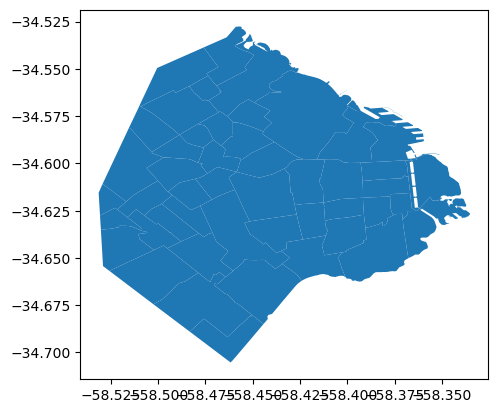

In [77]:
geo_barrios.plot()

<a id="section_punto"></a> 
#### Punto

A veces necesitamos ingresar la locacion de un lugar en particular.

Por ejemplo, vamos a crear un GeoDataFrame que contenga un *Punto*, que representa el dato geoespacial de la sede de Digital House.

En este caso, vamos a crear un Punto con la asistencia de *shapely*. Y luego lo transformamos en un DataGeoFrame para poder graficarlo.

In [78]:
from shapely.geometry import Point
p = Point( -58.443555,-34.548921) # dato geoespacial de DH
df = pd.DataFrame(data = {'id': [1]}) # Armo un DataFrame
geo_dh = gpd.GeoDataFrame(df, geometry=[p]) # lo transformo en GeoDataFrame
geo_dh

,id,geometry
0,1,POINT (-58.44356 -34.54892)


In [79]:
type(geo_dh)

geopandas.geodataframe.GeoDataFrame

Graficamos el punto que representa a Digital House sobre los barrios de Buenos Aires

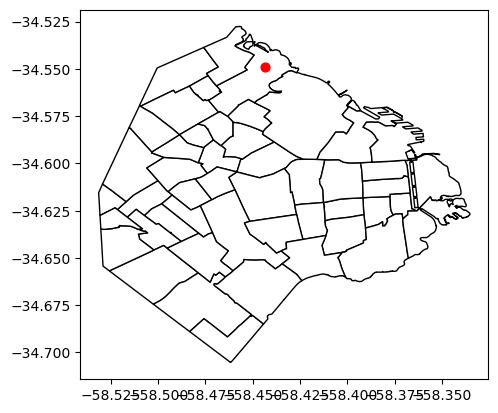

In [80]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
geo_dh.plot(ax=ax, marker='o', color='red', markersize=40)
plt.show();

<div id="comisarias" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Leer el archivo comisarias.csv, y generar la columna <i>geometry</i> que representa el dato geoespacial de cada comisaria.</label></div>
</div>

---

<a id="section_linea_punto"></a> 
### Generar una línea entre dos puntos
[volver a TOC](#section_toc)

A partir de dos *puntos* que representan dos lugares, podemos trazar la *línea* que los une.

Supongamos que queremos hacer una recorrida por algunos locales bailables. Empezamos en "REY CASTRO", luego "AFRIKA", "LA CITY" y terminamos el mismo día en "PACHA BS AS". 

Queremos conocer el recorrido lineal que vamos a hacer.

Tenemos que transformar las coordenadas de las columnas X e Y  de los locales bailables, en un tipo de datos Point, para generar la línea entre los puntos.

Observar que el tipo de datos *Point* es distinto al tipo de datos *geometry*.

In [81]:
punto_rey_castro = Point(geo_locales[geo_locales['NOMBRE']=='REY CASTRO'].X,
                         geo_locales[geo_locales['NOMBRE']=='REY CASTRO'].Y)

punto_afrika = Point(geo_locales[geo_locales['NOMBRE']=='AFRIKA'].X,
                     geo_locales[geo_locales['NOMBRE']=='AFRIKA'].Y)

punto_la_city = Point(geo_locales[geo_locales['NOMBRE']=='LA CITY'].X,
                      geo_locales[geo_locales['NOMBRE']=='LA CITY'].Y)

punto_pacha = Point(geo_locales[geo_locales['NOMBRE']=='PACHA BS AS'].X,
                    geo_locales[geo_locales['NOMBRE']=='PACHA BS AS'].Y)

In [82]:
punto_afrika.type

/tmp/ipykernel_5687/722541428.py:1: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  punto_afrika.type


'Point'

Y ahora sí creamos las **líneas** entre dos puntos, usando el método **LineString** de la libreria shapely.

In [83]:
from shapely.geometry import LineString
linea_a = LineString([punto_rey_castro, punto_afrika])
linea_b = LineString([punto_afrika, punto_la_city])
linea_c = LineString([punto_la_city, punto_pacha])

In [84]:
linea_a.type

/tmp/ipykernel_5687/4009642178.py:1: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  linea_a.type


'LineString'

Finalmente, graficamos las líneas sobre los barrios de Buenos Aires.

Pero para graficar, necesitamos el método *plot* que se *aplica* a las GeoSeries y GeoDataFrame.

Nosotros tenemos hasta ahora puntos y líneas, con los tipos de datos *Point y LineString* respectivamente. Tenemos que generar una GeoSerie con los dos puntos y la línea que los vincula para poder graficarlos.

In [85]:
linea_a_geo = gpd.GeoSeries([punto_rey_castro, punto_afrika, linea_a])
linea_b_geo = gpd.GeoSeries([punto_afrika, punto_la_city, linea_b])
linea_c_geo = gpd.GeoSeries([punto_la_city, punto_pacha, linea_c])

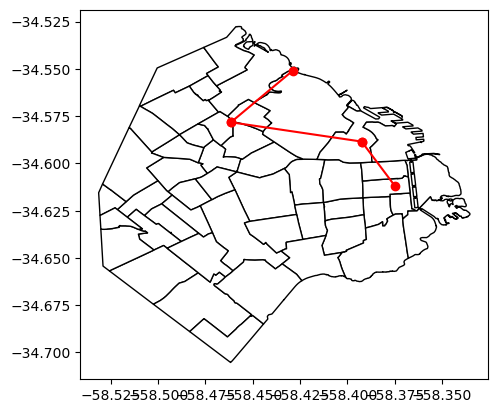

In [86]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
linea_a_geo.plot(ax=ax, color='red')
linea_b_geo.plot(ax=ax, color='red')
linea_c_geo.plot(ax=ax, color='red')
plt.show();

---

<a id="section_punto_poligono"></a> 
### Determinar si un punto se encuentra dentro de un polígono
[volver a TOC](#section_toc)

Con el método `GeoDataFrame.contains` podemos ver si un polígono contiene un punto.

Como ejemplo, veamos si el local bailable *REY CASTRO* se encuentra en el barrio *MONSERRAT*.

Primero generamos dos GeoDataFrame con los datos del barrio y del local bailable.

In [87]:
geo_monserrat = geo_barrios.loc[geo_barrios["BARRIO"]=="MONSERRAT"]
geo_rey_castro = geo_locales[geo_locales['NOMBRE']=='REY CASTRO'] 

In [88]:
type(geo_rey_castro)

geopandas.geodataframe.GeoDataFrame

Chequeamos visualmente si se encuentra "REY CASTRO" en el barrio "MONSERRAT"

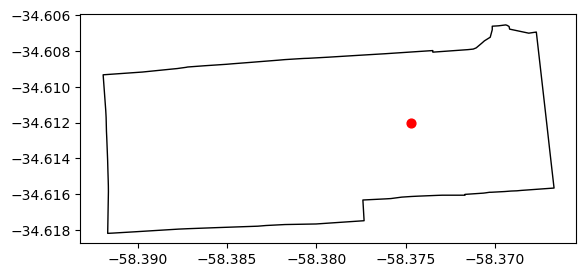

In [89]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_monserrat.plot(ax=ax, color='white', edgecolor='black')
geo_rey_castro.plot(ax=ax, marker='o', color='red', markersize=40)
plt.show();

Ahora lo validamos con la función *GeoDataFrame.contains*.

Observar que para el local bailable, usamos *punto_rey_castro*, el tipo de datos Point generado anteriormente. Si usamos el GeoDataFrame *geo_rey_castro*, el método contains da error.

In [90]:
geo_monserrat.contains(punto_rey_castro)

41    True
dtype: bool

---

<a id="section_linea_poligono"></a> 
### Dada una línea, conocer qué poligonos atraviesa
[volver a TOC](#section_toc)

Pensando como figuras geométricas, una línea puede pasar por varios polígonos.

Como ejemplo, consideremos la linea que trazamos entre los locales bailables "AFRIKA" y "LA CITY" que generamos con la siguiente sentencia:

`linea_b = LineString([punto_afrika, punto_la_city])`

Y analicemos que barrios atraviesa.

El método **crosses** aplicado al GeoDataFrame de los barrios, indica *True* o *False* de acuerdo a si la línea atraviesa o no cada barrio (polígono). Es decir, devuelve un dato tipo *boolean* para indicar si pasa por el polígono.

Podemos observar que para los primeros barrios, solo atraviesa al barrio que tiene índice 0.

In [91]:
geo_barrios.crosses(linea_b).head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

Ahora aplicamos el resultado anterior para obtener los barrios por donde pasa.

In [92]:
geo_barrios.loc[geo_barrios.crosses(linea_b), 'BARRIO']

0         CHACARITA
23       COLEGIALES
28    VILLA ORTUZAR
33          PALERMO
44         RECOLETA
Name: BARRIO, dtype: object

Lo podemos verificar visualmente

In [93]:
options = ['CHACARITA','COLEGIALES','VILLA ORTUZAR','PALERMO','RECOLETA'] 
geo_barrios_recorrida = geo_barrios[geo_barrios['BARRIO'].isin(options)] 
geo_barrios_recorrida

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",CHACARITA,15.0,7725.695228,3.118101e+06
23,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",COLEGIALES,13.0,6374.619045,2.289774e+06
28,"POLYGON ((-58.46055 -34.57794, -58.46022 -34.5...",VILLA ORTUZAR,15.0,5684.995211,1.853802e+06
33,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...",PALERMO,14.0,21768.074886,1.577250e+07
44,"POLYGON ((-58.39521 -34.57219, -58.39482 -34.5...",RECOLETA,2.0,21246.611702,6.140873e+06


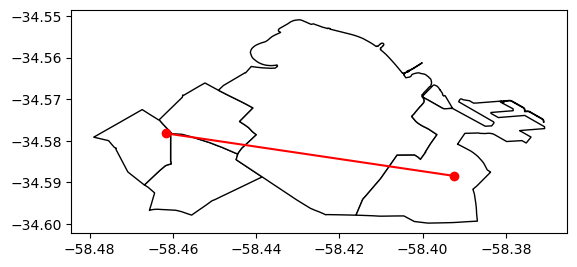

In [94]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_barrios_recorrida.plot(ax=ax, color='white', edgecolor='black')
linea_b_geo.plot(ax=ax, color='red')
plt.show();

---

<a id="section_distancia"></a> 
### Calcular la distancia entre dos puntos
[volver a TOC](#section_toc)

Ahora que sabemos como trazar líneas entre dos puntos, es razonable preguntarse cual es la distancia entre ellos. 

Vamos a calcular la *distancia* entre la ubicación de Digital House y todos los locales bailables. Y almacenamos la distancia como una nueva columna del GeoDataFrame geo_locales.

Comencemos calculando una distancia en particular. Por ejemplo, entre el edificio de Digital House y el local bailable "AFRIKA". 

Generamos un punto que identifique la posición geoespacial de cada lugar. Observar que para definir la latitud y longitud de cada lugar, la libreria **geopy** necesita que se exprese como una **tupla**.

In [95]:
punto_dh_t = ( -58.443555,-34.548921) # dato geoespacial de DH
punto_afrika_t = ( -58.39239, -34.58843) # dato geoespacial de Afrika

In [96]:
type(punto_dh_t)

tuple

Para calcular distancias entre dos puntos, usamos la libreria **geopy**, el método *distance*.

Observar que el resultado se puede expresar en diferentes unidades de medida: meters, kilometers, miles.

In [97]:
import geopy.distance
dist = geopy.distance.geodesic(punto_dh_t,punto_afrika_t)
dist.meters

6149.000030999574

In [98]:
dist.kilometers

6.149000030999574

Ahora si, calculamos todas las distancias entre Digital House y los locales bailables, y la guardamos como una nueva columna *distancia* en el GeoDataFrame geo_locales.

In [99]:
for i in geo_locales.index:
    geo_locales.loc[i, 'distancia'] = geopy.distance.geodesic(punto_dh_t,
                  (geo_locales.loc[i,'geometry'].x
                  ,geo_locales.loc[i,'geometry'].y)).meters

In [100]:
geo_locales.loc[:4, ['distancia','geometry','X', 'Y','NOMBRE','CALLE','NUMERO']]

,distancia,geometry,X,Y,NOMBRE,CALLE,NUMERO
0,6444.086302,POINT (-58.39375 -34.60503),-58.393750,-34.605027,CASTELBAMBA,RIOBAMBA,345
1,7750.134933,POINT (-58.37851 -34.59600),-58.378510,-34.596003,GOLDEN,ESMERALDA,1040
2,8507.137497,POINT (-58.37473 -34.61200),-58.374727,-34.612002,REY CASTRO,PERU,342
3,6806.307281,POINT (-58.39015 -34.60553),-58.390154,-34.605531,LA FRANCE,SARMIENTO,1656
4,8578.074664,POINT (-58.37175 -34.60195),-58.371747,-34.601950,BAHREIN,LAVALLE,343


Hoy a la salida de clase quiero ir a bailar al local bailable que esté más cerca (ciencia ficción!!):

In [101]:
geo_locales.loc[geo_locales['distancia'].idxmin(),:]

X                                                               -58.447784
Y                                                               -34.547025
NUMERO_REGISTRO                                                         55
NOMBRE                                                             CLUB 74
CALLE                                                    FIGUEROA ALCORTA 
NUMERO                                                                7474
DIRECCION_NORMALIZADA                               FIGUEROA ALCORTA  7474
NUMERO_EXPEDIENTE                                                 10836/05
CAPACIDAD                                                     180 personas
CLASE                                                                  "B"
ESTADO                                                 INSCRIPCION VENCIDA
DISPOSICION                                                             65
FECHA_DISP_INSCRIPCION                                 2005-05-18 00:00:00
NUMERO_DIPS              

---

<div id="distancia" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Calcular la distancia entre los locales bailables 'LA CITY' y 'PACHA BS AS'.</label></div>
</div>

---

### Referencias

Geopandas Documentacion

https://geopandas.org/gallery/create_geopandas_from_pandas.html

The GeoPandas Cookbook

https://www.martinalarcon.org/2018-12-31-d-geopandas/

The Shapely User Manual

https://shapely.readthedocs.io/en/stable/manual.html

GeoPy’s documentation

https://geopy.readthedocs.io/en/stable/